# Settling the debate: Is "The Empire Strikes Back" the best star wars movie?

In this project using a survey from the online tool "SurveyMonkey" so investigate peoples opinions on different star wars movies and what factors my effect their judgement.

## Part 1: Reading in libraries and exploring data

In [11]:
#Relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Reading in data and getting a snapshot
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [12]:
#Looking at what columns may be relevant
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Part 2: Cleaning the data

In [13]:
#Mapping to boolean values
yes_or_no = { "Yes": True, "No": False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_or_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_or_no)



In [14]:
#Mapping to boolean values for further analysis
yes_or_no1 = { "Star Wars: Episode I  The Phantom Menace": True, np.nan: False}
star_wars["Which of the following Star Wars films have you seen? Please select all that apply."] = star_wars["Which of the following Star Wars films have you seen? Please select all that apply."].map(yes_or_no1)

yes_or_no2 = { "Star Wars: Episode II  Attack of the Clones": True, np.nan: False}
star_wars["Unnamed: 4"] = star_wars["Unnamed: 4"].map(yes_or_no2)

yes_or_no3 = { "Star Wars: Episode III  Revenge of the Sith": True, np.nan: False}
star_wars["Unnamed: 5"] = star_wars["Unnamed: 5"].map(yes_or_no3)

yes_or_no4 = { "Star Wars: Episode IV  A New Hope": True, np.nan: False}
star_wars["Unnamed: 6"] = star_wars["Unnamed: 6"].map(yes_or_no4)

yes_or_no5 = { "Star Wars: Episode V The Empire Strikes Back": True, np.nan: False}
star_wars["Unnamed: 7"] = star_wars["Unnamed: 7"].map(yes_or_no5)

yes_or_no6 = { "Star Wars: Episode VI Return of the Jedi": True, np.nan: False}
star_wars["Unnamed: 8"] = star_wars["Unnamed: 8"].map(yes_or_no6)

In [15]:
#Renaming columns
renamed_columns = {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen1", 
                   "Unnamed: 4":"seen2", "Unnamed: 5": "seen3", "Unnamed: 6": "seen4", "Unnamed: 7": "seen5", "Unnamed: 8": "seen6"}

star_wars.rename(columns = renamed_columns, inplace= True)

In [16]:
#Renaming for more appropriate column heads and changing to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
rename_columns_ranking = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking1", "Unnamed: 10":"ranking2", "Unnamed: 11":"ranking3", "Unnamed: 12":"ranking4", "Unnamed: 13":"ranking5", "Unnamed: 14":"ranking6"}
star_wars.rename(columns = rename_columns_ranking, inplace= True)

## Part 3: Analysing the data

Text(0, 0.5, 'Mean ranking from 0 to 5 stars')

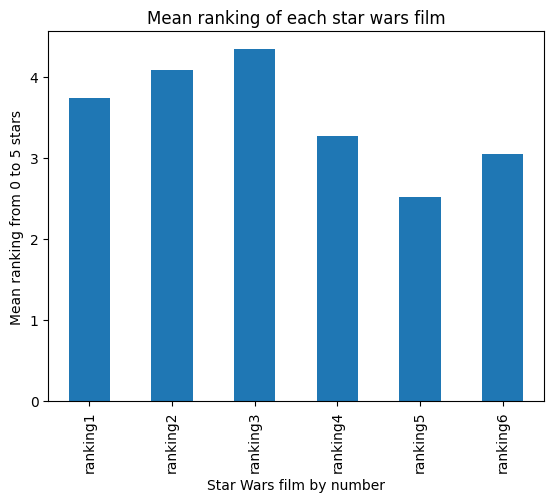

In [17]:
#Mean ranking for each star wars film
movie_rank_means = star_wars[star_wars.columns[9:15]].mean()
movie_rank_means.plot.bar()
plt.title("Mean ranking of each star wars film")
plt.xlabel("Star Wars film by number")
plt.ylabel("Mean ranking from 0 to 5 stars")


Looks like the "the Empire Strikes back" which is the 5th movie had the highest ranking, with the 3rd being the worst recieved. Let's investigate this further.

Text(0, 0.5, 'Movie by number')

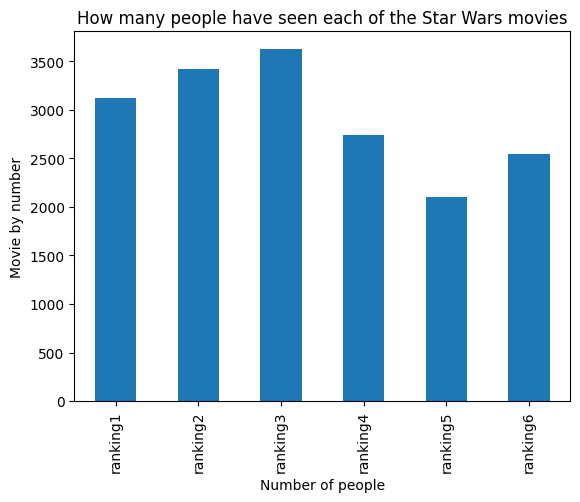

In [18]:
#Plot to see how many people have seen a particular star wars movie
seen_sum = star_wars[star_wars.columns[9:15]].sum()
seen_sum.plot.bar()
plt.title("How many people have seen each of the Star Wars movies")
plt.xlabel("Number of people")
plt.ylabel("Movie by number")

The above graph shows that movie 5, "The empire strikes back" is the best reviewed but also the least watched. This could of had an impact on its score. Let's investigate how gender impacts the ratings.

In [19]:
#Isolating by gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

Text(0, 0.5, 'Star Wars movies by number')

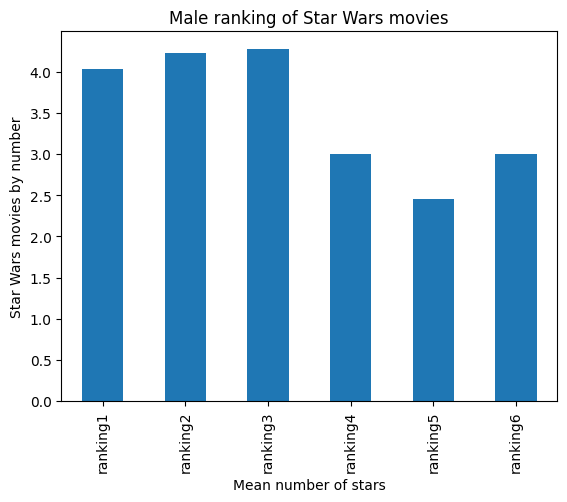

In [20]:
#isolating data by gender
movie_rank_means_male = males[males.columns[9:15]].mean()
seen_sum_male = males[males.columns[9:15]].sum()

#Ranking plot for women
movie_rank_means_male.plot.bar()
plt.title("Male ranking of Star Wars movies")
plt.xlabel("Mean number of stars")
plt.ylabel("Star Wars movies by number")

Text(0, 0.5, 'Movie by number')

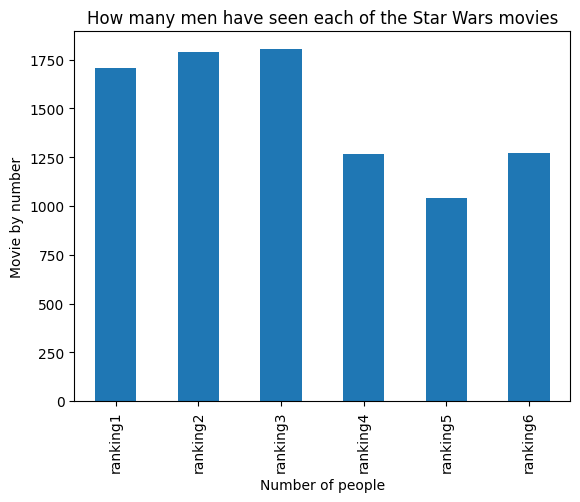

In [21]:
#Seen plot for men
seen_sum_male.plot.bar()
plt.title("How many men have seen each of the Star Wars movies")
plt.xlabel("Number of people")
plt.ylabel("Movie by number")

Text(0, 0.5, 'Star Wars movies by number')

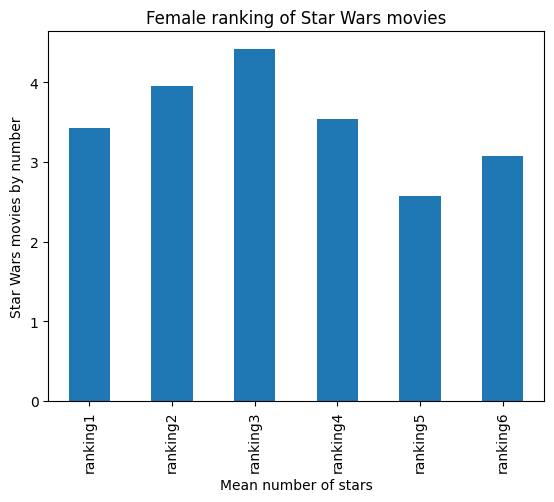

In [22]:
#Isolating data by gender
movie_rank_means_female = females[females.columns[9:15]].mean()
seen_sum_female = females[females.columns[9:15]].sum()

#Ranking plot for women
movie_rank_means_female.plot.bar()
plt.title("Female ranking of Star Wars movies")
plt.xlabel("Mean number of stars")
plt.ylabel("Star Wars movies by number")

Text(0, 0.5, 'Movie by number')

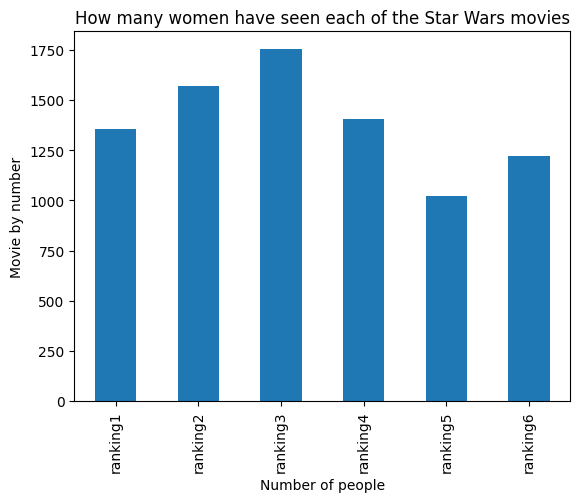

In [23]:
#Seen plot for women
seen_sum_female.plot.bar()
plt.title("How many women have seen each of the Star Wars movies")
plt.xlabel("Number of people")
plt.ylabel("Movie by number")

As we can see from the above graphs, gender was not a factor in how the movies were percieved.

## Part 4: discussion and conclusion

The the data we can see that "The Empire Strikes back" is the most well re